# Isolation Forest para Detección de Anomalías

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

## Datos

In [4]:
# datos sintéticos
data, _ = make_blobs(n_samples=1000, centers=[[0, 0]], cluster_std=0.4, random_state=42)

# datos en entrenamiento y prueba
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)

# anomalías sintéticas
np.random.seed(42)
n_anomalies = 50
anomalies = np.random.uniform(low=-6, high=6, size=(n_anomalies, 2))
X_test_anomaly = np.vstack([X_test, anomalies])

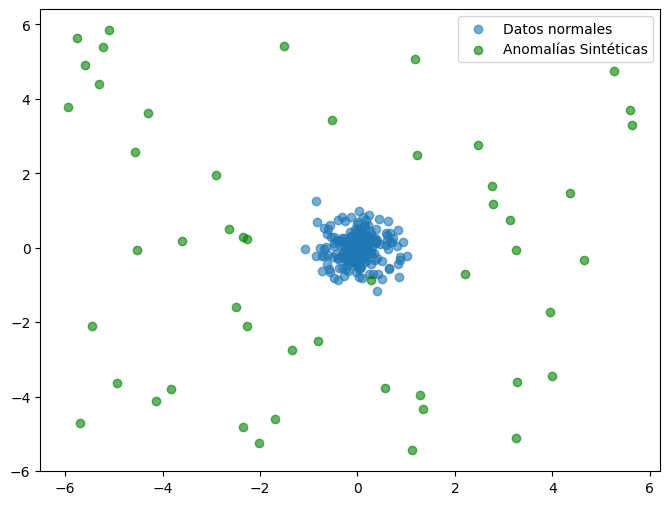

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], label='Datos normales', alpha=0.6)
plt.scatter(anomalies[:, 0], anomalies[:, 1], label='Anomalías Sintéticas', alpha=0.6, color='green')
plt.legend()
plt.show()

## Isolation Forest

- El parámetro **contamination** indica la proporción de datos que se esperan que sean anomalías

**¿Cómo se estima el parámetro contamination?**

- Si no tienes un criterio claro ni etiquetas de anomalías, podrías estimar un rango razonable entre 1% a 10%

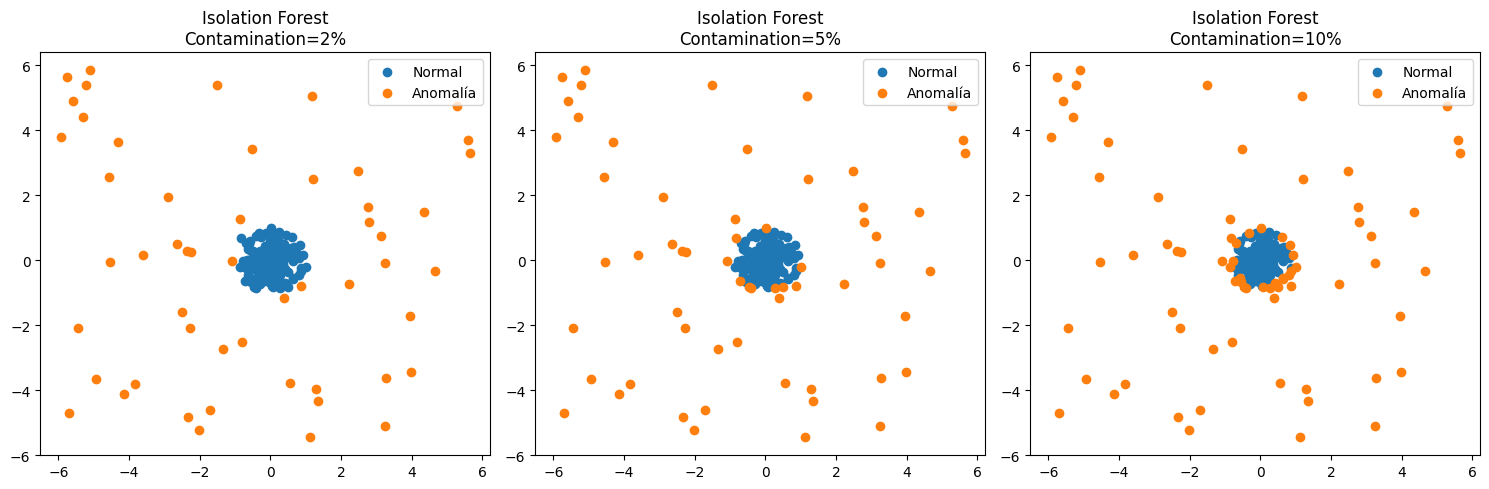

In [20]:
contamination_list = [0.02, 0.05, 0.10]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, contamination in enumerate(contamination_list):
    # train
    iso = IsolationForest(contamination=contamination, random_state=42)
    iso.fit(X_train)
    # predict
    y_pred = iso.predict(X_test_anomaly)
    axes[i].scatter(X_test_anomaly[y_pred == 1, 0],
                    X_test_anomaly[y_pred == 1, 1],
                    label='Normal')
    axes[i].scatter(X_test_anomaly[y_pred == -1, 0],
                    X_test_anomaly[y_pred == -1, 1],
                    label='Anomalía')
    axes[i].legend()
    axes[i].set_title(f"Isolation Forest\nContamination={int(contamination*100)}%")
plt.tight_layout()  # Ajusta el espaciado entre subplots
plt.show()